<a href="https://colab.research.google.com/github/shivareddy0117/Whatsapp_Activity_Daily_routine_analysis/blob/main/ChatAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import re

# Define the path to your chat log file
file_path = "/content/chatlog.txt"

# Initialize lists to hold the data
dates = []
chats = []

# Define a function to check if a line starts with a date stamp
def starts_with_timestamp(line):
    # This regex matches the date-time stamp at the start of each message
    return re.match(r'\d{2}/\d{2}/\d{2}, \d{2}:\d{2} -', line) is not None

# Read the file
current_chat = None
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if line.strip():  # Make sure the line is not empty
            if starts_with_timestamp(line):
                if current_chat:  # If there's an ongoing message, save it before starting a new one
                    dates.append(date_part)
                    chats.append(current_chat)
                # Start a new message
                parts = line.split('-', 1)  # Split on the first dash, which separates date from chat
                date_part = parts[0].strip()
                current_chat = parts[1].strip() if len(parts) > 1 else ''
            else:
                # This is a continuation of the current chat
                current_chat += ' ' + line.strip()

# Don't forget to add the last message if the file ends
if current_chat:
    dates.append(date_part)
    chats.append(current_chat)

# Create a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Chat': chats
})

print(df.tail(10))  # Print the first few rows to verify


                 Date                                               Chat
2637  11/05/24, 09:01                               Harsha_UH-giri: Arey
2638  11/05/24, 09:01                    Harsha_UH-giri: Ippudu em doing
2639  11/05/24, 09:01                               shivareddy: Em ledhu
2640  11/05/24, 09:01          Harsha_UH-giri: Mari antha sepu enduku ra
2641  11/05/24, 09:01       Harsha_UH-giri: Copy paste and oka prompt ki
2642  11/05/24, 09:02                 Harsha_UH-giri: Give me in 10 mins
2643  11/05/24, 09:02  Harsha_UH-giri: I'll try to do it from my end ...
2644  11/05/24, 09:02                              Harsha_UH-giri: Start
2645  11/05/24, 09:02                                   shivareddy: Okay
2646  11/05/24, 09:02              Harsha_UH-giri: 9.15 ki malla aduguta


In [14]:
fdf = df[df['Chat'].str.startswith('shivareddy: 1. When did you eat')]

In [15]:
fdf.head()

,Date,Chat
1180,"10/03/24, 09:19",shivareddy: 1. When did you eat dinner last ni...
1196,"11/03/24, 05:12",shivareddy: 1. When did you eat dinner last ni...
1257,"12/03/24, 05:30",shivareddy: 1. When did you eat dinner last ni...
1305,"13/03/24, 06:01",shivareddy: 1. When did you eat dinner last ni...
1328,"14/03/24, 07:14",shivareddy: 1. When did you eat dinner last ni...


In [16]:
fdf.iloc[0][1]

'shivareddy: 1. When did you eat dinner last night?   8:30 2. When did you sleep last night?    10:30 3. When did you wake up today morning?  9:00 4. How many hours did you sleep?  10:30'

In [17]:
fdf.to_csv("chat.csv", index = False)

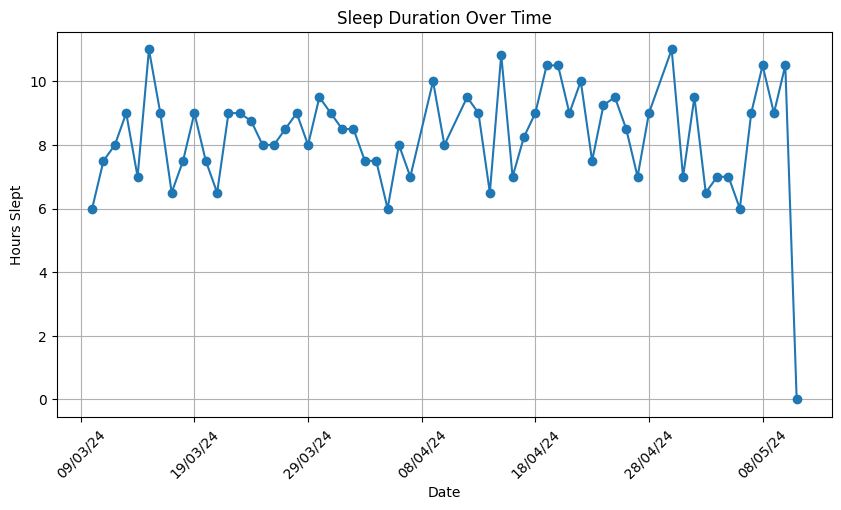

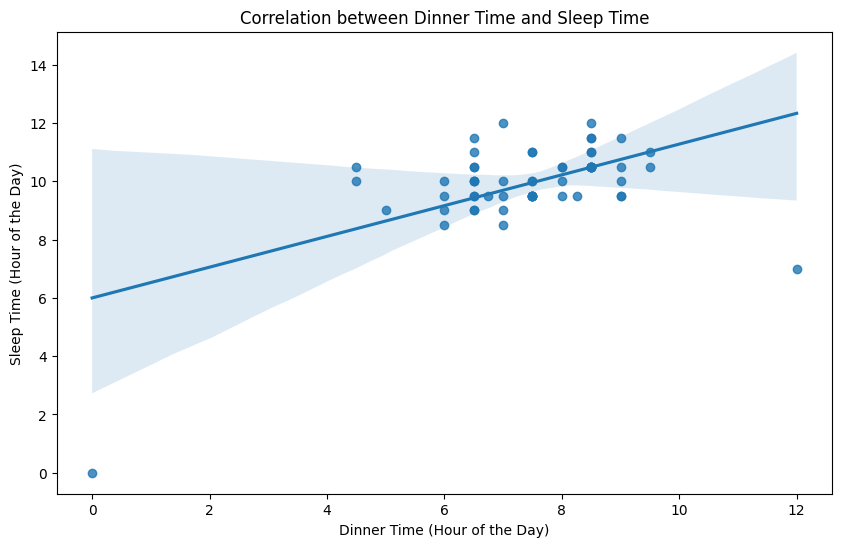

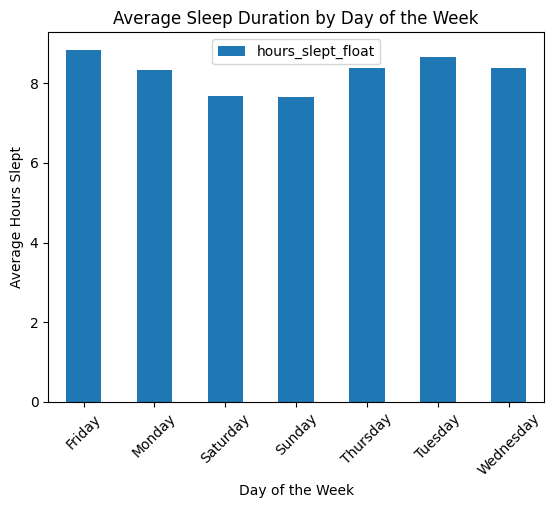

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Load your data  # updated few outliers manually in the data based on my experience. and given data.
data_path = '/content/chat3.csv'
data = pd.read_csv(data_path)

# Data cleaning and type conversion
data['date'] = pd.to_datetime(data['date'].str.strip(), format='%d/%m/%y')  # Correct format for day/month/year

# Function to process time data, remove spaces, and convert to datetime
def clean_and_convert_time(series, time_format='%H:%M'):
    return pd.to_datetime(series.str.strip(), format=time_format, errors='coerce').dt.time

data['Wake Time'] = clean_and_convert_time(data['Wake Time'])
data['message time'] = clean_and_convert_time(data['message time'])
data['dinner'] = clean_and_convert_time(data['dinner'])
data['sleep'] = clean_and_convert_time(data['sleep'])

# Convert 'hours slept' from 'HH:MM' to total hours as a float
data['hours_slept_float'] = data['hours slept'].apply(
    lambda x: float(x.split(':')[0]) + float(x.split(':')[1]) / 60 if pd.notna(x) else None
)

# Visualization: Sleep Duration Over Time
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['hours_slept_float'], marker='o', linestyle='-')
plt.title('Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Hours Slept')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Adjust the tick interval as needed
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlation analysis
data['dinner_float'] = data['dinner'].apply(lambda x: x.hour + x.minute / 60 if x is not None else None)
data['sleep_float'] = data['sleep'].apply(lambda x: x.hour + x.minute / 60 if x is not None else None)

plt.figure(figsize=(10, 6))
sns.regplot(x='dinner_float', y='sleep_float', data=data)
plt.title('Correlation between Dinner Time and Sleep Time')
plt.xlabel('Dinner Time (Hour of the Day)')
plt.ylabel('Sleep Time (Hour of the Day)')
plt.show()

# Weekly Patterns Analysis
data['day_of_week'] = data['date'].dt.day_name()

pivot_table = data.pivot_table(index='day_of_week', values='hours_slept_float', aggfunc='mean')
pivot_table.plot(kind='bar')
plt.title('Average Sleep Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Hours Slept')
plt.xticks(rotation=45)
plt.show()


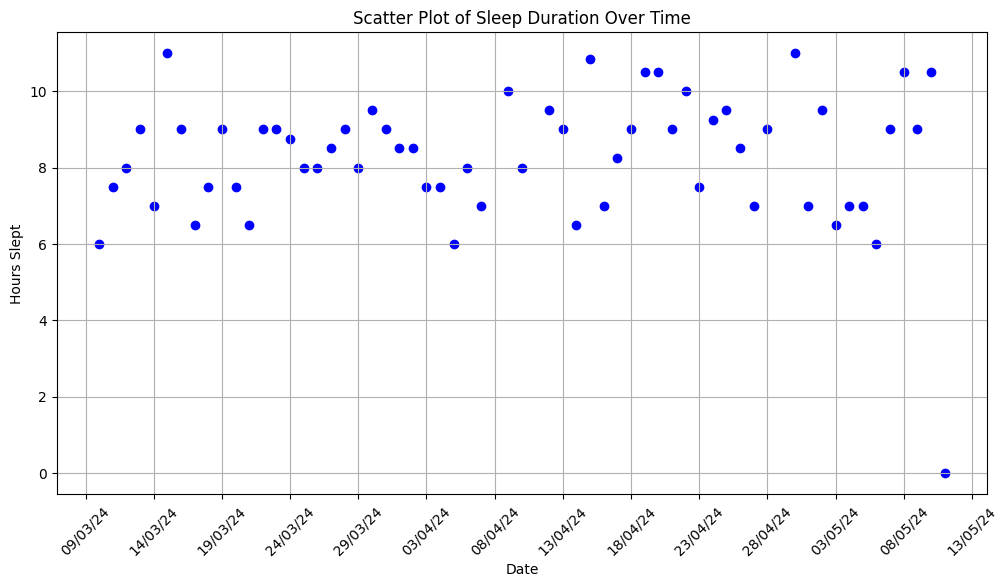

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your data
data_path = '/content/chat3.csv'
data = pd.read_csv(data_path)

# Correct date parsing using the specified format
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%y')

# Ensure 'hours slept' is in a numerical format for plotting
data['hours_slept_float'] = data['hours slept'].apply(
    lambda x: float(x.split(':')[0]) + float(x.split(':')[1]) / 60 if pd.notna(x) else None
)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['date'], data['hours_slept_float'], color='blue')
plt.title('Scatter Plot of Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Hours Slept')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show a tick every 5 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


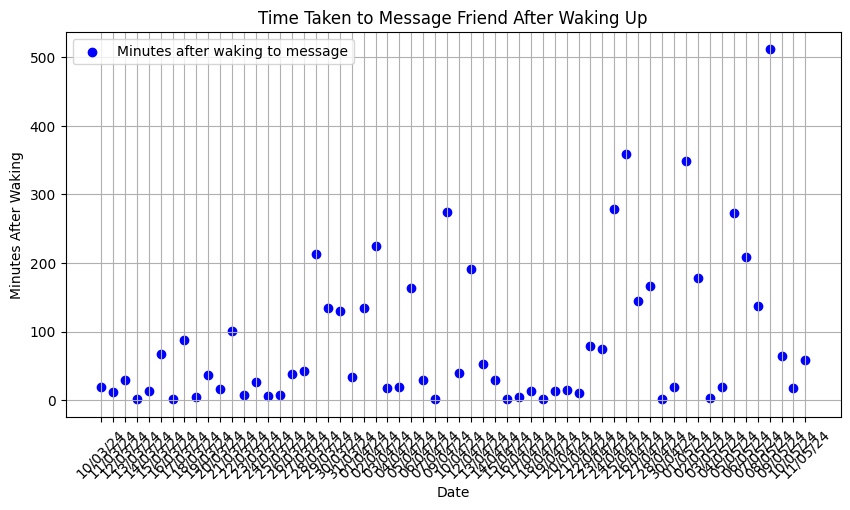

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data_path = '/content/chat3.csv'
data = pd.read_csv(data_path)

# Function to convert time in HH:MM format to minutes from midnight
def time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Apply conversion to Wake Time and Message Time
data['Wake Time Minutes'] = data['Wake Time'].apply(time_to_minutes)
data['Message Time Minutes'] = data['message time'].apply(time_to_minutes)

# Calculate the time difference in minutes
data['Time Difference'] = data['Message Time Minutes'] - data['Wake Time Minutes']

# Save the updated DataFrame with the new column to a new CSV file
updated_data_path = '/content/updated_chat3.csv'
data.to_csv(updated_data_path, index=False)

# Visualization: Time Difference in Messaging After Waking Up
plt.figure(figsize=(10, 5))
plt.scatter(data['date'], data['Time Difference'], color='blue', label='Minutes after waking to message')
plt.title('Time Taken to Message Friend After Waking Up')
plt.xlabel('Date')
plt.ylabel('Minutes After Waking')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()
